# Text pre-processing

In [34]:
data.shape

(16435, 7)

In [35]:
import nltk
#nltk.download()

In [36]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Convert all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'shouldn', 'each', 'll', 'while', 'yourselves', 'during', 'can', 'don', 'be', 'through', 'myself', 'their', 'ain', 'very', 'some', "you're", "should've", 'after', "doesn't", 'o', 'needn', 'more', 'it', 'because', 'what', 'been', 'were', 'off', "shan't", 'into', 'have', 'our', 'up', 'the', "won't", 'but', "mightn't", 'against', 'having', 'd', 'between', 'other', 'i', 'your', "couldn't", 't', 'yours', 'than', 'and', 'hadn', 'aren', 'from', 'he', 'to', 'over', "hadn't", "wouldn't", 'so', 'will', 'you', 'was', 'yourself', 'before', 'or', 'them', 'ours', 'own', 'down', 'ourselves', 'him', 'had', 'is', 'wasn', 've', 'an', 's', 'haven', 'once', 'mightn', 'here', 'most', 'its', 'whom', 'does', 'few', 'no', 'now', 'with', 'where', 'not', "aren't", 'his', "that'll", 'all', "isn't", 'won', "don't", 'who', 'there', 'itself', "you've", 'by', 'about', 'a', 'further', 'on', 'wouldn', "shouldn't", 'those', 'both', 'hasn', 'mustn', 'above', 'same', 'isn', "she's", 'am', "it's", 'no

In [37]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

3.824720300000081 seconds


In [38]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


## Stemming 

In [39]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))


# I tried using stemming on our titles and it didnot work very well. 


argu
fish


In [40]:
from nltk.stem import SnowballStemmer
#stemmer = SnowballStemmer()
stemmer = SnowballStemmer("english")
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))


argu
fish


# Text based product similarity

In [41]:
#data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [42]:
# Utility Functions which I will be using through the rest of the process.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # displaying it in notebook 
    plt.imshow(img)
  
# plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        
        # Dividing the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # I don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## Bag of Words (BoW) on product titles.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus


# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(16435, 12684)

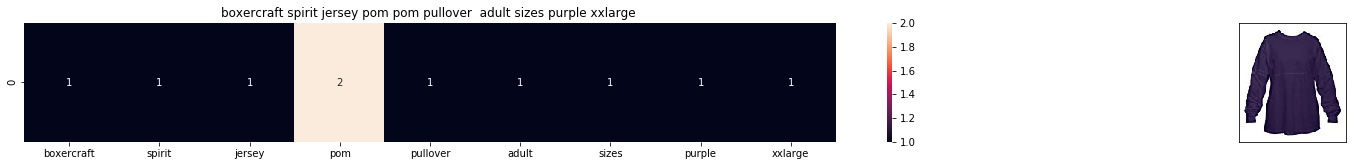

ASIN : B00VXQX1Z6
Brand: boxercraft
Title: boxercraft spirit jersey pom pom pullover  adult sizes purple xxlarge 
Euclidean similarity with the query image : 0.0


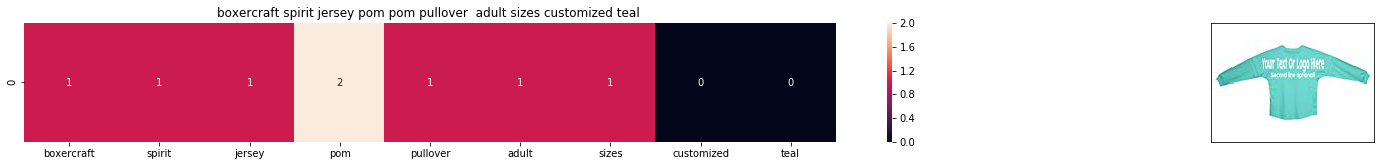

ASIN : B01H8GTPFE
Brand: boxercraft
Title: boxercraft spirit jersey pom pom pullover  adult sizes customized teal 
Euclidean similarity with the query image : 2.0


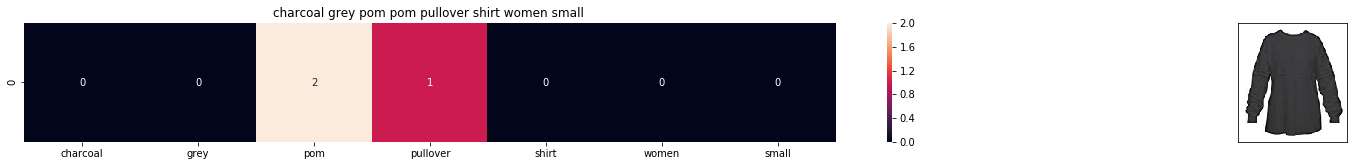

ASIN : B00MPWIAXA
Brand: Touch of Europe
Title: charcoal grey pom pom pullover shirt women small 
Euclidean similarity with the query image : 3.4641016151377544


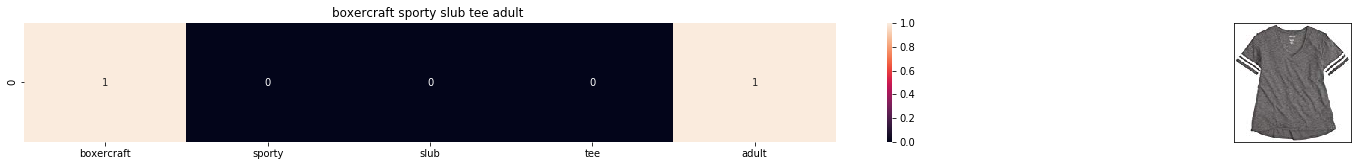

ASIN : B06VV7LJH2
Brand: boxercraft
Title: boxercraft sporty slub tee adult 
Euclidean similarity with the query image : 3.605551275463989


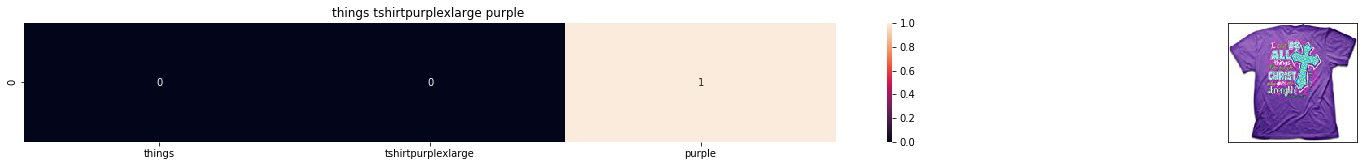

ASIN : B00HQ2V6A8
Brand: Kerusso
Title: things tshirtpurplexlarge purple 
Euclidean similarity with the query image : 3.605551275463989


In [44]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12596, 5) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931

## TF-IDF based product similarity

In [45]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

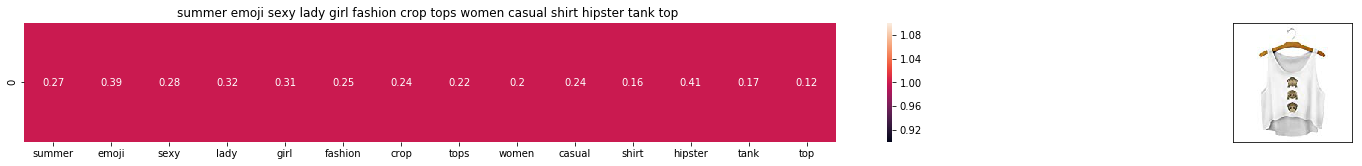

ASIN : B010V3BDII
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


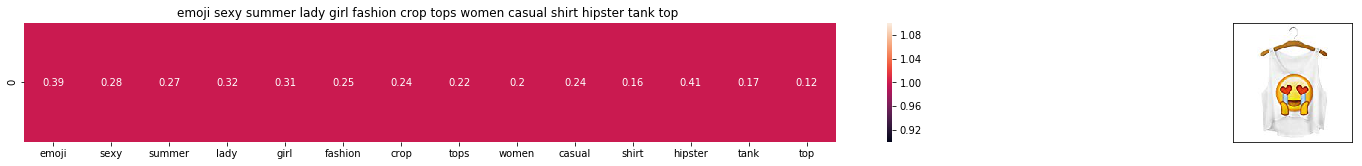

ASIN : B010V3BLWQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


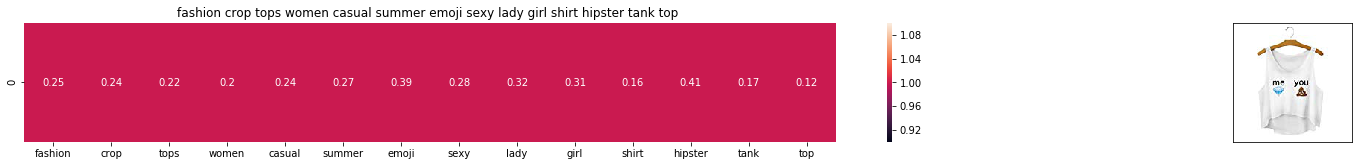

ASIN : B010V3B44G
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


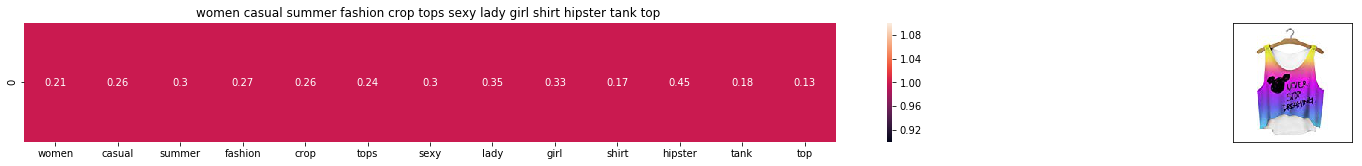

ASIN : B010V3AYSS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.40138594750234946


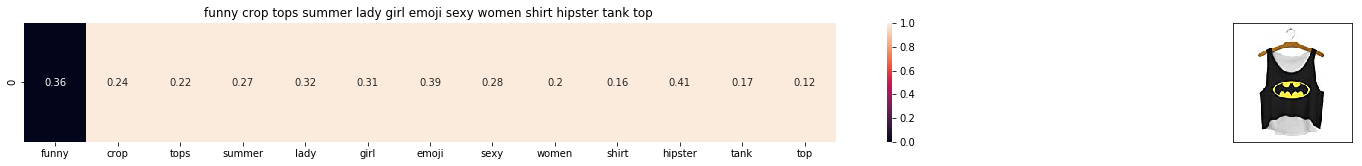

ASIN : B010V3C116
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4954421553895553


In [46]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 5)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

### IDF based product similarity

In [47]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])
idf_title_features.shape

(16435, 12684)

In [48]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [49]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)

    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

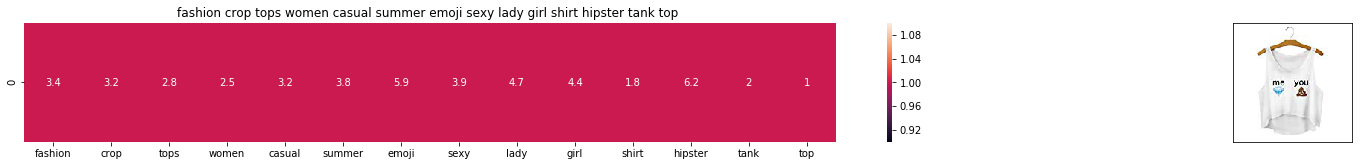

ASIN : B010V3B44G
Brand : Doxi Supermall
euclidean distance from the given image : 0.0


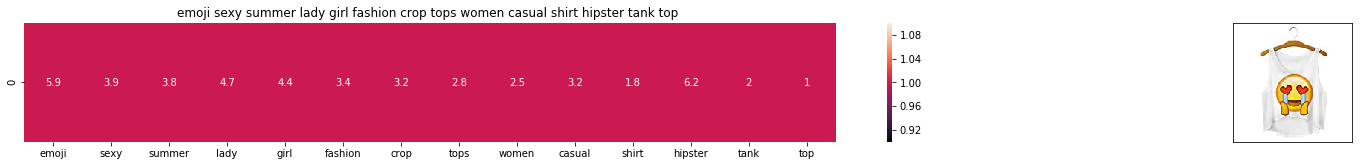

ASIN : B010V3BLWQ
Brand : Doxi Supermall
euclidean distance from the given image : 0.0


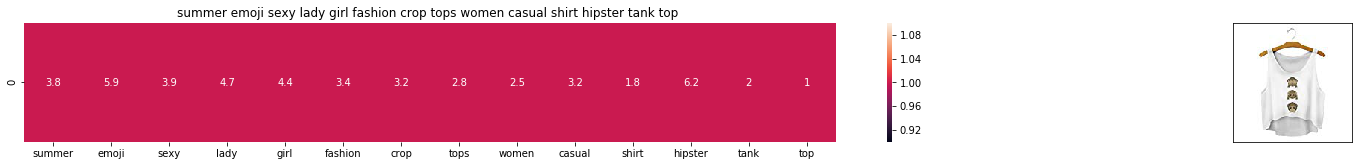

ASIN : B010V3BDII
Brand : Doxi Supermall
euclidean distance from the given image : 0.0


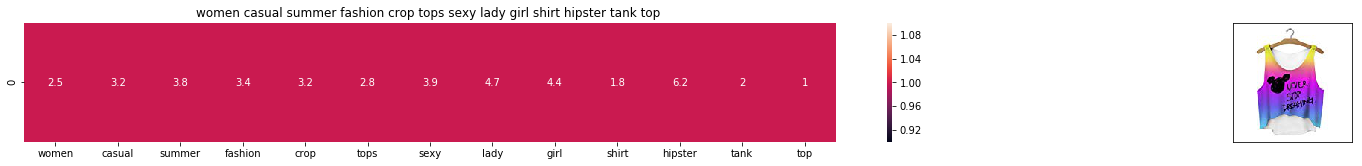

ASIN : B010V3AYSS
Brand : Doxi Supermall
euclidean distance from the given image : 5.922978852180059


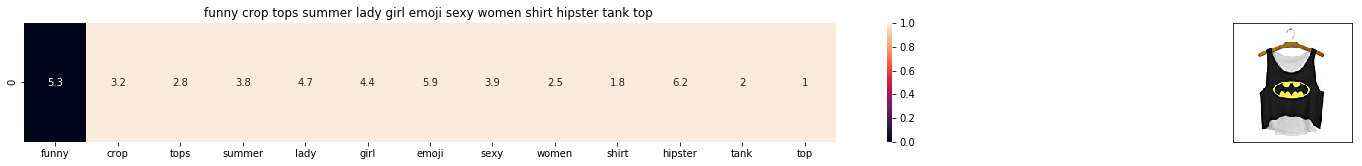

ASIN : B010V3C116
Brand : Doxi Supermall
euclidean distance from the given image : 7.037272185298332


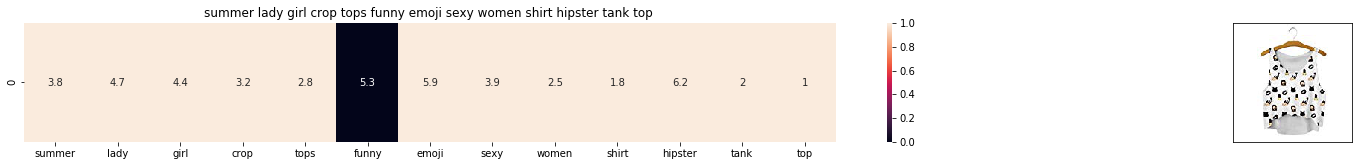

ASIN : B010V3BVMQ
Brand : Doxi Supermall
euclidean distance from the given image : 7.037272185298332


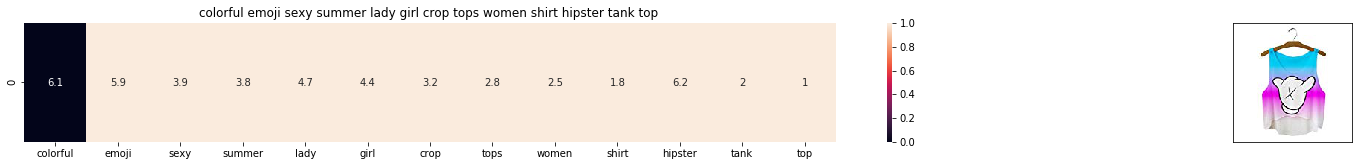

ASIN : B010V3BQZS
Brand : Doxi Supermall
euclidean distance from the given image : 7.667939547088641


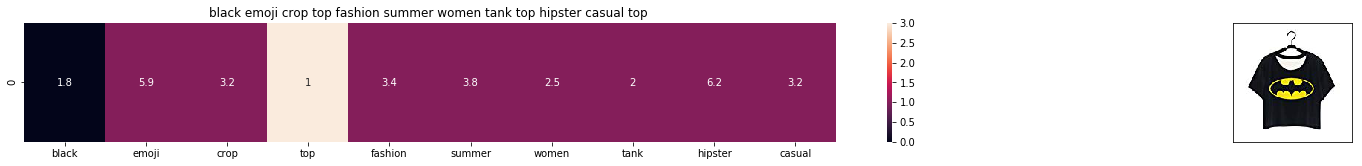

ASIN : B0124E80M4
Brand : Doxi Supermall
euclidean distance from the given image : 8.39863603811248


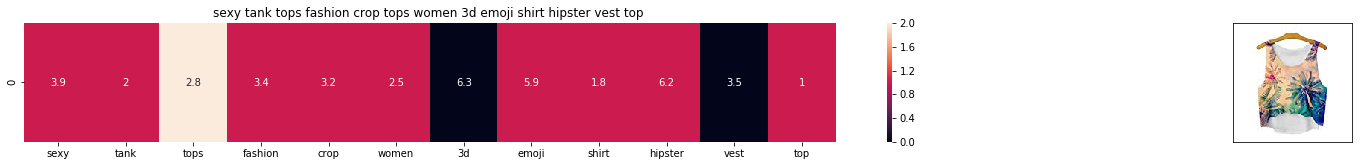

ASIN : B010V3DB9C
Brand : Doxi Supermall
euclidean distance from the given image : 10.835090137343855


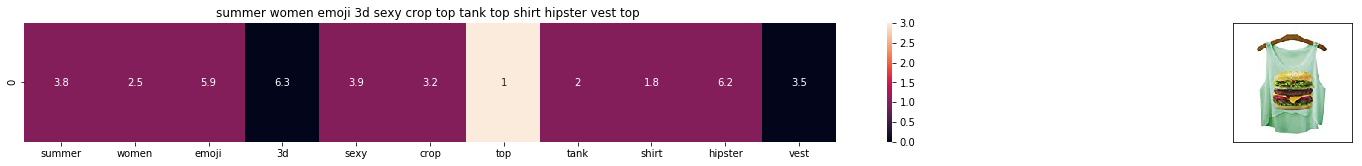

ASIN : B010V3E5EC
Brand : Doxi Supermall
euclidean distance from the given image : 11.060530175472811


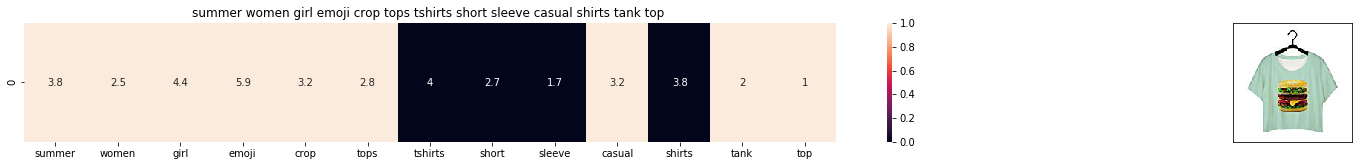

ASIN : B0124ECIU4
Brand : Doxi Supermall
euclidean distance from the given image : 11.456017724459604


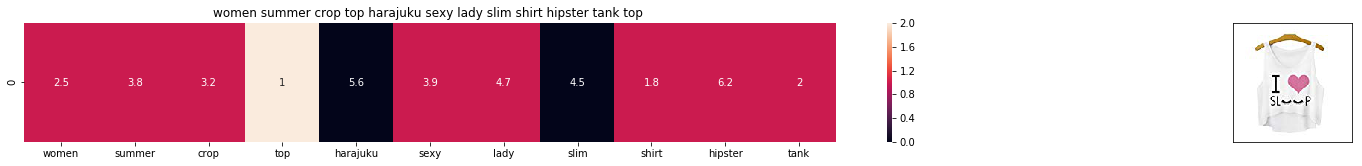

ASIN : B010V3EDEE
Brand : Doxi Supermall
euclidean distance from the given image : 11.635265990125815


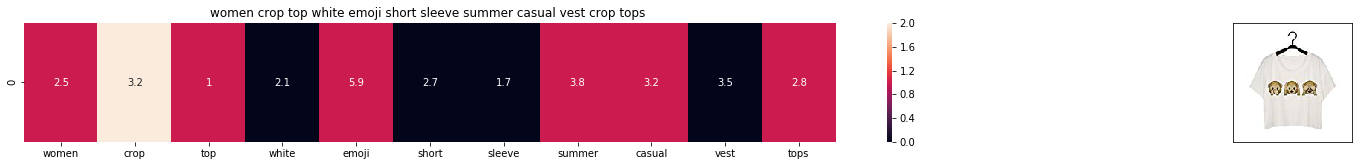

ASIN : B0124E7MHS
Brand : Doxi Supermall
euclidean distance from the given image : 11.844834283822053


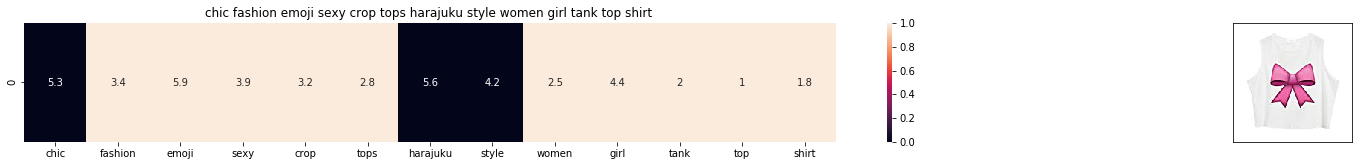

ASIN : B011RCJPR8
Brand : Chiclook Cool
euclidean distance from the given image : 12.760692810178545


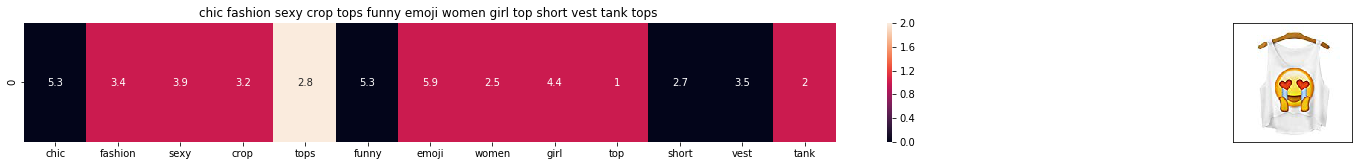

ASIN : B011RCJH58
Brand : Chiclook Cool
euclidean distance from the given image : 12.829128504563066


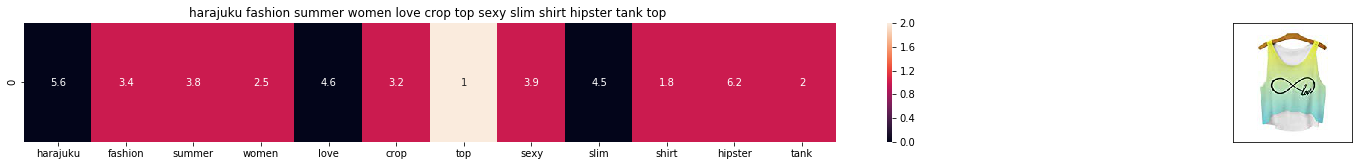

ASIN : B010V35OBU
Brand : Doxi Supermall
euclidean distance from the given image : 12.92180694297083


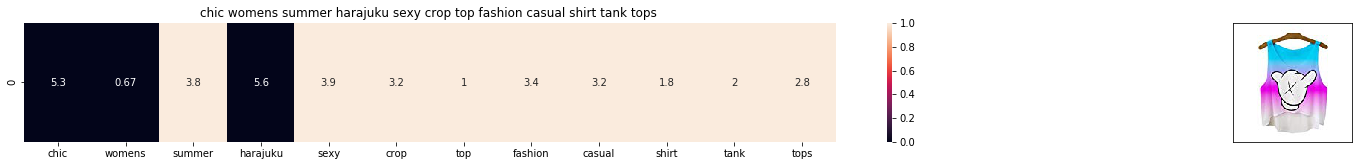

ASIN : B011RCJEMO
Brand : Chiclook Cool
euclidean distance from the given image : 13.474555736106787


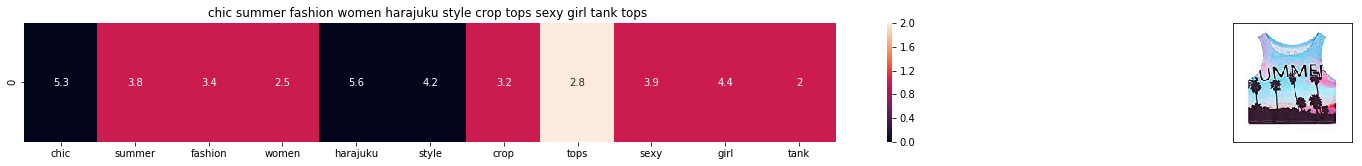

ASIN : B011OU51US
Brand : Chiclook Cool
euclidean distance from the given image : 13.713807644827545


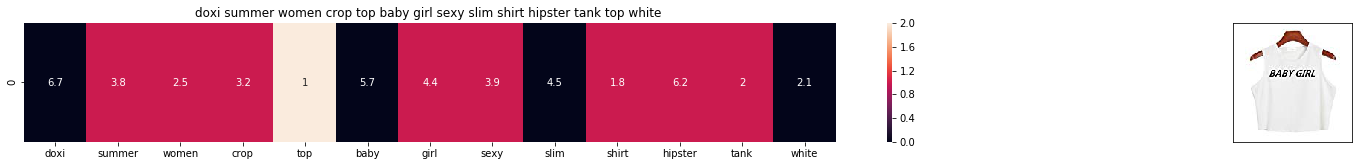

ASIN : B010V3A23U
Brand : Doxi Supermall
euclidean distance from the given image : 13.725325741546714


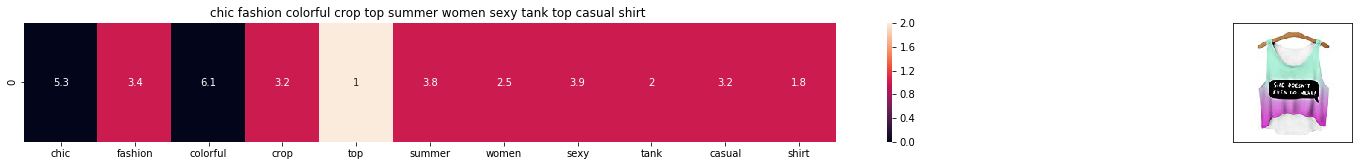

ASIN : B011RCJ6UE
Brand : Chiclook Cool
euclidean distance from the given image : 13.746787336587824


In [50]:
def idf_model(doc_id, num_results):
   
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(12566,20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title